# Greedy Algorithm
* https://programmercarl.com/%E8%B4%AA%E5%BF%83%E7%AE%97%E6%B3%95%E7%90%86%E8%AE%BA%E5%9F%BA%E7%A1%80.html#%E8%B4%AA%E5%BF%83%E7%9A%84%E5%A5%97%E8%B7%AF-%E4%BB%80%E4%B9%88%E6%97%B6%E5%80%99%E7%94%A8%E8%B4%AA%E5%BF%83


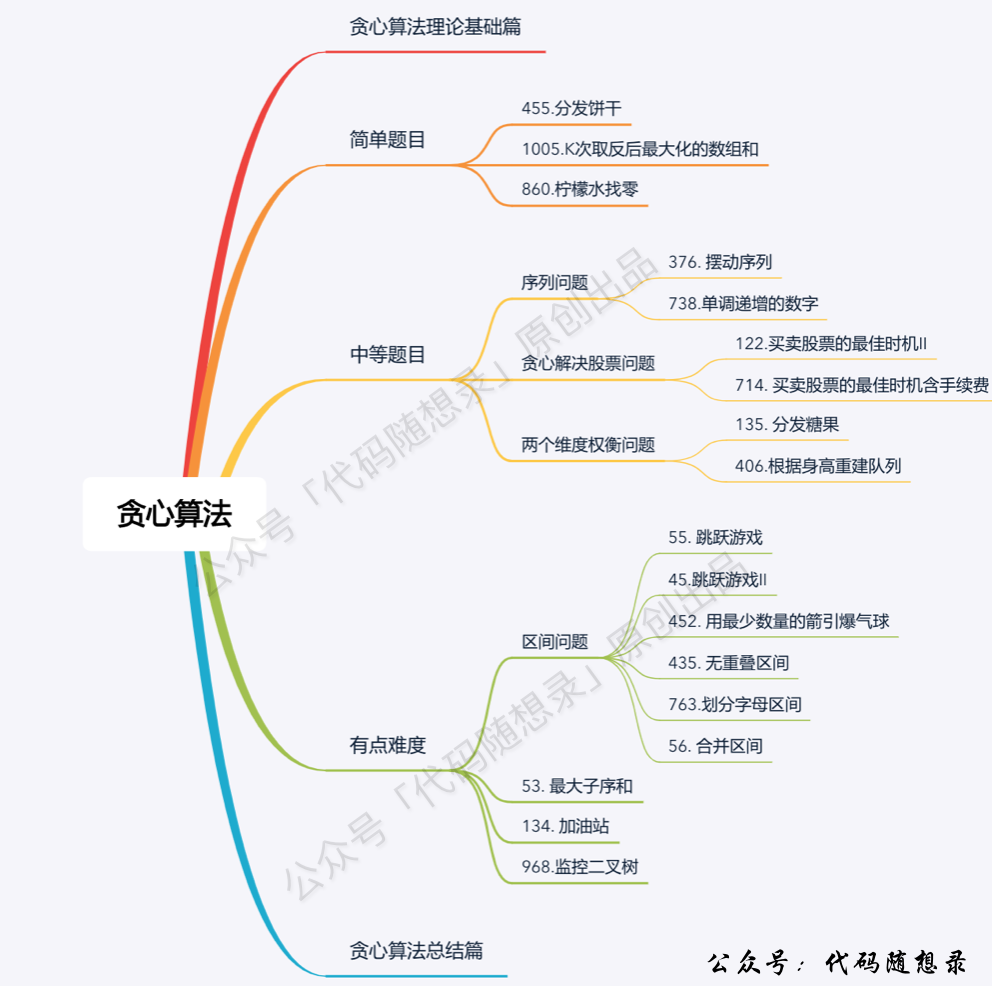

贪心的本质是选择每一阶段的局部最优，从而达到全局最优。

贪心算法一般分为如下四步：

1. 将问题分解为若干个子问题
2. 找出适合的贪心策略
3. 求解每一个子问题的最优解
4. 将局部最优解堆叠成全局最优解

# 455. Assign Cookies
* https://leetcode.com/problems/assign-cookies/description/
* https://programmercarl.com/0455.%E5%88%86%E5%8F%91%E9%A5%BC%E5%B9%B2.html#%E6%80%9D%E8%B7%AF

这题主要就是 用最大的填最大的

In [ ]:
class Solution:
    def findContentChildren(self, g: List[int], s: List[int]) -> int:
        g.sort(reverse = True)
        s.sort(reverse = True)
        ind = 0
        res = 0
        for i in range(len(g)): # 遍历胃口
            if ind >= len(s):
                break
            if s[ind] >= g[i]:
                res += 1
                ind += 1
        return res
# 时间复杂度：O(nlogn)
# 空间复杂度：O(1)

# 376. Wiggle Subsequence
* https://leetcode.com/problems/wiggle-subsequence/description/
* https://programmercarl.com/0376.%E6%91%86%E5%8A%A8%E5%BA%8F%E5%88%97.html

In [ ]:
# 上GA课的时候窥探了一下这个题，DP
class Solution:
    def wiggleMaxLength(self, nums: List[int]) -> int:
        positive, negative = 1, 1
        
        if len(nums) < 2:
            return len(nums)
        
        for i in range(1, len(nums)):
            if nums[i] > nums[i - 1]:
                positive = negative + 1
            elif nums[i] < nums[i - 1]:
                negative = positive + 1
                
        return max(positive, negative)

In [ ]:
# 贪心（版本一）

class Solution:
    def wiggleMaxLength(self, nums):
        if len(nums) <= 1:
            return len(nums)  # 如果数组长度为0或1，则返回数组长度
        curDiff = 0  # 当前一对元素的差值
        preDiff = 0  # 前一对元素的差值
        result = 1  # 记录峰值的个数，初始为1（默认最右边的元素被视为峰值）
        for i in range(len(nums) - 1):
            curDiff = nums[i + 1] - nums[i]  # 计算下一个元素与当前元素的差值
            # 如果遇到一个峰值
            if (preDiff <= 0 and curDiff > 0) or (preDiff >= 0 and curDiff < 0):
                result += 1  # 峰值个数加1
                preDiff = curDiff  # 注意这里，只在摆动变化的时候更新preDiff
        return result  # 返回最长摆动子序列的长度


In [ ]:
# 贪心（版本二）
# 两个版本其实一毛一样
class Solution:
    def wiggleMaxLength(self, nums: List[int]) -> int:
        if len(nums) <= 1:
            return len(nums)  # 如果数组长度为0或1，则返回数组长度
        preDiff,curDiff ,result  = 0,0,1  #题目里nums长度大于等于1，当长度为1时，其实到不了for循环里去，所以不用考虑nums长度
        for i in range(len(nums) - 1):
            curDiff = nums[i + 1] - nums[i]
            if curDiff * preDiff <= 0 and curDiff !=0:  #差值为0时，不算摆动
                result += 1
                preDiff = curDiff  #如果当前差值和上一个差值为一正一负时，才需要用当前差值替代上一个差值
        return result

In [ ]:
# 动态规划（版本一）

class Solution:
    def wiggleMaxLength(self, nums: List[int]) -> int:
        # 0 i 作为波峰的最大长度
        # 1 i 作为波谷的最大长度
        # dp是一个列表，列表中每个元素是长度为 2 的列表
        dp = []
        for i in range(len(nums)):
            # 初始为[1, 1]
            dp.append([1, 1])
            for j in range(i):
                # nums[i] 为波谷
                if nums[j] > nums[i]:
                    dp[i][1] = max(dp[i][1], dp[j][0] + 1)
                # nums[i] 为波峰
                if nums[j] < nums[i]:
                    dp[i][0] = max(dp[i][0], dp[j][1] + 1)
        return max(dp[-1][0], dp[-1][1])

In [ ]:
# 动态规划（版本二）

class Solution:
    def wiggleMaxLength(self, nums):
        dp = [[0, 0] for _ in range(len(nums))]  # 创建二维dp数组，用于记录摆动序列的最大长度
        dp[0][0] = dp[0][1] = 1  # 初始条件，序列中的第一个元素默认为峰值，最小长度为1
        for i in range(1, len(nums)):
            dp[i][0] = dp[i][1] = 1  # 初始化当前位置的dp值为1
            for j in range(i):
                if nums[j] > nums[i]:
                    dp[i][1] = max(dp[i][1], dp[j][0] + 1)  # 如果前一个数比当前数大，可以形成一个上升峰值，更新dp[i][1]
            for j in range(i):
                if nums[j] < nums[i]:
                    dp[i][0] = max(dp[i][0], dp[j][1] + 1)  # 如果前一个数比当前数小，可以形成一个下降峰值，更新dp[i][0]
        return max(dp[-1][0], dp[-1][1])  # 返回最大的摆动序列长度

In [ ]:
# 动态规划（版本三）优化
# 因为不需要记录table所以可以只用up 和down来记录，其实就是negative和positive
# 这两个其实只会相差1
class Solution:
    def wiggleMaxLength(self, nums):
        if len(nums) <= 1:
            return len(nums)  # 如果数组长度为0或1，则返回数组长度
        
        up = down = 1  # 记录上升和下降摆动序列的最大长度
        for i in range(1, len(nums)):
            if nums[i] > nums[i-1]:
                up = down + 1  # 如果当前数比前一个数大，则可以形成一个上升峰值
            elif nums[i] < nums[i-1]:
                down = up + 1  # 如果当前数比前一个数小，则可以形成一个下降峰值
        
        return max(up, down)  # 返回上升和下降摆动序列的最大长度

# 53. Maximum Subarray
* https://leetcode.com/problems/maximum-subarray/
* https://programmercarl.com/0053.%E6%9C%80%E5%A4%A7%E5%AD%90%E5%BA%8F%E5%92%8C.html

In [ ]:
# 自己写的
# 用的是6515GA学的知识，差点就忘了
class Solution:
    def maxSubArray(self, nums: List[int]) -> int:
        T = [0]*len(nums)
        T[0] = nums[0]
        for i in range(1, len(nums)):
            if T[i-1] > 0:
                T[i] = T[i-1] + nums[i]
            else:
                T[i] = nums[i]
        return max(T)

In [ ]:
# 暴力法

class Solution:
    def maxSubArray(self, nums):
        result = float('-inf')  # 初始化结果为负无穷大
        count = 0
        for i in range(len(nums)):  # 设置起始位置
            count = 0
            for j in range(i, len(nums)):  # 从起始位置i开始遍历寻找最大值
                count += nums[j]
                result = max(count, result)  # 更新最大值
        return result

In [ ]:
class Solution:
    def maxSubArray(self, nums):
        result = float('-inf')  # 初始化结果为负无穷大
        count = 0
        for i in range(len(nums)):
            count += nums[i]
            if count > result:  # 取区间累计的最大值（相当于不断确定最大子序终止位置）
                result = count
            if count <= 0:  # 相当于重置最大子序起始位置，因为遇到负数一定是拉低总和
                count = 0
        return result